In [22]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
# csv_file pathing
fertility_rate_path = "Resource/fred_fertility_rates.csv"
living_arrangements_path = "Resource/census_living_arrangements.csv"
marital_status_path = "Resource/marital status overtime.csv"
age_fertility_path = "Resource/Age_Fertility.csv"
education_path = "Resource/Female Education Attainment Level.csv"

In [4]:
# Raw DataFrame Prep: Fertility Rates

# Read csv, drop na
fertility_rate_df = pd.read_csv(fertility_rate_path).dropna()

# Clean data
fertility_rate_df['DATE'] = pd.to_datetime(fertility_rate_df['DATE'].str.strip(), format='%d/%m/%Y').dt.year
fertility_rate_df.rename(columns = {'SPDYNTFRTINUSA':'fertility_rate','DATE':'Year'}, inplace = True) 

# Print and display
print(f'{len(fertility_rate_df)} records')
fertility_rate_df.head()

# Print to csv - remove hashmark in front of below code to export to csv
# fertility_rate_df.to_csv("Output/fertility_rate.csv", index=False, header=True)


59 records


,Year,fertility_rate
0,1960,3.654
1,1961,3.620
2,1962,3.461
3,1963,3.319
4,1964,3.190


## Fertility Rate vs Living Arrangements

In [ ]:
# Raw DataFrame Prep: Living Arrangements

# Read csv, drop na
living_arrangements_df = pd.read_csv(living_arrangements_path).dropna()

# Merge with fertility rates
merge_living_df = pd.merge(fertility_rate_df, living_arrangements_df, on = "Year", how = "outer").dropna()

# Print, display, export options
print(f'{len(merge_living_df)} records')
# merge_living_df.head()
# merge_living_df.to_csv("Output/living_arrangements.csv", index=False, header=True)

In [ ]:
# Living Arrangements Bar Chart

# Clean and organize
other_ttl = merge_living_df['father_only'] + merge_living_df['other_relatives'] + merge_living_df['non_relatives']
pct_mother_only = merge_living_df['mother_only'] / merge_living_df['under_18'] 
pct_two_parents = merge_living_df['two_parents'] / merge_living_df['under_18'] 
pct_other = merge_living_df['other'] / merge_living_df['under_18'] 

merge_living_df['other']= other_ttl
merge_living_df['%_mother_only']= pct_mother_only.map("{:,.2%}".format)
merge_living_df['%_two_parents']= pct_two_parents.map("{:,.2%}".format)
merge_living_df['%_other']= pct_other.map("{:,.2%}".format)

# Create data frame w/specific chart data required
chart_data_df = merge_living_df[['Year', 'fertility_rate', 'under_18', 'mother_only', 'two_parents', 'other', '%_mother_only', '%_two_parents', '%_other']].reset_index(drop=True)
pct_mother_only = chart_data_df['mother_only'] / chart_data_df['under_18'] 
pct_two_parents = chart_data_df['two_parents'] / chart_data_df['under_18'] 
pct_other = chart_data_df['other'] / chart_data_df['under_18'] 

# Drop Outlier
chart_data_df = chart_data_df[chart_data_df.Year != 1960]
chart_data_df.head()

# Print output
chart_data_df.to_csv("Output/living_arrangements_chartdata.csv", index=False, header=True)

In [ ]:
# Living Arrangements Line Chart

x_axis_data = chart_data_df['Year']
y_axis1 = chart_data_df['%_mother_only']
y_axis2 = chart_data_df['%_other']
y_axis3 = chart_data_df['%_two_parents']

plt.plot(x_axis_data, y_axis1)
plt.plot(x_axis_data, y_axis2)
plt.plot(x_axis_data, y_axis3)


In [ ]:
# Living Arrangements Scatter Chart

fertility_rate = chart_data_df['fertility_rate']
mother_only = chart_data_df['%_mother_only']

plt.scatter(fertility_rate, mother_only, marker="o", facecolors="red", edgecolors="gray")

plt.xlabel('Fertility Rate')
plt.ylabel('Mother Only')

plt.show()


## Fertility Rate vs Marital Status

In [5]:
# Raw DataFrame Prep: Marital Status
import numpy as np
# Read csv, drop na
marital_status_df = pd.read_csv(marital_status_path).dropna()

# Merge with fertility rates
merge_marital_df = pd.merge(fertility_rate_df, marital_status_df, on="Year", how="outer")

# Print and display
print(f'{len(merge_marital_df)} records')
merge_marital_df.head()

# Print to csv - remove hashmark in front of below code to export to csv
merge_marital_df.to_csv("Output/marital_status.csv", index=False, header=True)
merge_marital_df.head()

61 records


,Year,fertility_rate,Men Total,Married Men,Unmarried Men Total,Never Married Men,Widowed Men,Divorced Men,Women Total,Married Women,Unmarried Women Total,Never Married Women,Widowed Women,Divorced Women
0,1960,3.654,"60,273","41,781","18,492","15,274","2,112","1,106","64,607","42,583","22,024","12,252","8,064","1,708"
1,1961,3.620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1962,3.461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1963,3.319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1964,3.190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#drop Nan
clean_marital_df=merge_marital_df.dropna(how="any")
clean_marital_df.columns

Index(['Year', 'fertility_rate', 'Men Total', 'Married Men',
       'Unmarried Men Total', 'Never Married Men', 'Widowed Men',
       'Divorced Men', 'Women Total', 'Married Women',
       'Unmarried Women Total ', 'Never Married Women', 'Widowed Women',
       'Divorced Women'],
      dtype='object')

In [7]:
#get rid of warning
import warnings
warnings.filterwarnings('ignore')

#change column value
clean_marital_df['Men Total'] = clean_marital_df['Men Total'].str.replace(',', '').astype(float)
clean_marital_df['Married Men'] = clean_marital_df['Married Men'].str.replace(',', '').astype(float)
clean_marital_df['Unmarried Men Total'] = clean_marital_df['Unmarried Men Total'].str.replace(',', '').astype(float)
clean_marital_df['Never Married Men'] = clean_marital_df['Never Married Men'].str.replace(',', '').astype(float)
clean_marital_df['Widowed Men'] = clean_marital_df['Widowed Men'].str.replace(',', '').astype(float)
clean_marital_df['Divorced Men'] = clean_marital_df['Divorced Men'].str.replace(',', '').astype(float)
clean_marital_df['Women Total'] = clean_marital_df['Women Total'].str.replace(',', '').astype(float)
clean_marital_df['Married Women'] = clean_marital_df['Married Women'].str.replace(',', '').astype(float)
clean_marital_df['Unmarried Women Total '] = clean_marital_df['Unmarried Women Total '].str.replace(',', '').astype(float)
clean_marital_df['Never Married Women'] = clean_marital_df['Never Married Women'].str.replace(',', '').astype(float)
clean_marital_df['Widowed Women'] = clean_marital_df['Widowed Women'].str.replace(',', '').astype(float)
clean_marital_df['Divorced Women'] = clean_marital_df['Divorced Women'].str.replace(',', '').astype(float)
clean_marital_df.dtypes

Year                        int64
fertility_rate            float64
Men Total                 float64
Married Men               float64
Unmarried Men Total       float64
Never Married Men         float64
Widowed Men               float64
Divorced Men              float64
Women Total               float64
Married Women             float64
Unmarried Women Total     float64
Never Married Women       float64
Widowed Women             float64
Divorced Women            float64
dtype: object

In [8]:
#caculate percentage
#men
married_men_per=clean_marital_df['Married Men']/clean_marital_df['Men Total']
unm_men_per=clean_marital_df['Unmarried Men Total']/clean_marital_df['Men Total']
never_mar_mp=clean_marital_df['Never Married Men']/clean_marital_df['Men Total']
#women
married_wm_per=clean_marital_df['Married Women']/clean_marital_df['Women Total']
unm_wm_per=clean_marital_df['Unmarried Women Total ']/clean_marital_df['Women Total']
never_mar_wp=clean_marital_df['Never Married Women']/clean_marital_df['Women Total']
#total
total_p=clean_marital_df['Men Total']+clean_marital_df['Women Total']
total_married=clean_marital_df['Married Men']+clean_marital_df['Married Women']
total_unm=clean_marital_df['Unmarried Men Total']+clean_marital_df['Never Married Women']
total_never=clean_marital_df['Never Married Men']+clean_marital_df['Never Married Women']
married_per=total_married/total_p
unmarried_per=total_unm/total_p
never_per=total_never/total_p
#add column to df
clean_marital_df["Per of married men"]=married_men_per
clean_marital_df["Per of unmarried men"]=unm_men_per
clean_marital_df["Per of Never married men"]=never_mar_mp
clean_marital_df["Per of married women"]=married_wm_per
clean_marital_df["Per of unmarried women"]=unm_wm_per
clean_marital_df["Per of Never married women"]=never_mar_wp
clean_marital_df["Per of married peole"]=married_per
clean_marital_df["Per of unmarried peole"]=unmarried_per
clean_marital_df["Per of Never married peole"]=never_per
clean_marital_df.head()

,Year,fertility_rate,Men Total,Married Men,Unmarried Men Total,Never Married Men,Widowed Men,Divorced Men,Women Total,Married Women,...,Divorced Women,Per of married men,Per of unmarried men,Per of Never married men,Per of married women,Per of unmarried women,Per of Never married women,Per of married peole,Per of unmarried peole,Per of Never married peole
0,1960,3.6540,60273.0,41781.0,18492.0,15274.0,2112.0,1106.0,64607.0,42583.0,...,1708.0,0.693196,0.306804,0.253414,0.659108,0.340892,0.189639,0.675561,0.246188,0.220420
10,1970,2.4800,70559.0,47109.0,23450.0,19832.0,2051.0,1567.0,77766.0,48148.0,...,2717.0,0.667654,0.332346,0.281070,0.619139,0.380861,0.220752,0.642218,0.273838,0.249445
20,1980,1.8395,81947.0,51813.0,30134.0,24227.0,1977.0,3930.0,89914.0,52965.0,...,5966.0,0.632275,0.367725,0.295642,0.589063,0.410948,0.224948,0.609667,0.293028,0.258657
30,1990,2.0810,91955.0,55833.0,36121.0,27505.0,2333.0,6283.0,99838.0,56797.0,...,8845.0,0.607177,0.392812,0.299114,0.568892,0.431098,0.227549,0.587248,0.306784,0.261860
33,1993,2.0195,94854.0,56833.0,38021.0,28775.0,2468.0,6778.0,102400.0,57768.0,...,9883.0,0.599163,0.400837,0.303361,0.564141,0.435850,0.229824,0.580982,0.312060,0.265186


In [18]:
#correlation between married and never married
correlation = st.pearsonr(married_per,never_per)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.96


In [20]:
#correlation between married and unmarried
correlation = st.pearsonr(married_per,unmarried_per)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.99


The variables “Married” and "unmarried" are not independent variables. They indicate the same thing.

In [26]:
#t test between fertility rate and married
feritility_rate=clean_marital_df['fertility_rate']
st.ttest_ind(feritility_rate,married_per,equal_var=False)

Ttest_indResult(statistic=24.06107693828698, pvalue=5.3124305780152914e-21)

In [28]:
#t test between fertility rate and unmarried
st.ttest_ind(feritility_rate,unmarried_per,equal_var=False)

Ttest_indResult(statistic=25.80385764417617, pvalue=3.342697085528269e-33)

T test indicated that there is no signficate difference between fertility rate and marital stauts. In another word, Fertility rate is not significantly relevant with marital status.

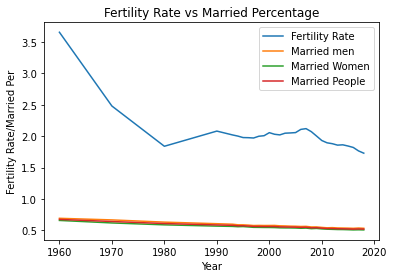

In [9]:
#line chart compared married percentage vs fertility rate
x_axis_data = clean_marital_df['Year']
y_axis1 = fertility_rate
y_axis2 = clean_marital_df['Per of married men']
y_axis3 = clean_marital_df['Per of married women']
y_axis4=clean_marital_df["Per of married peole"]

plt.plot(x_axis_data, y_axis1,label="Fertility Rate")
plt.plot(x_axis_data, y_axis2,label="Married men")
plt.plot(x_axis_data, y_axis3,label="Married Women")
plt.plot(x_axis_data,y_axis4,label="Married People")
plt.legend(loc="best")
plt.xlabel('Year')
plt.ylabel('Fertility Rate/Married Per')
plt.title('Fertility Rate vs Married Percentage')
#save fig
plt.savefig("Output/fertility_married_line.png")

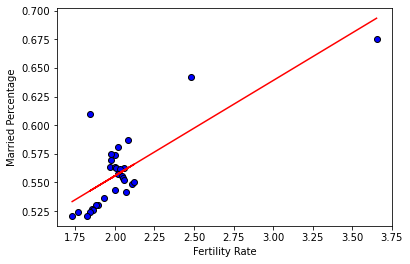

The correlation between both factors is 0.8


<Figure size 432x288 with 0 Axes>

In [10]:
#scatter plot fertility rate vs married people
plt.scatter(fertility_rate, married_per, marker="o", facecolors="blue", edgecolors="black")
plt.xlabel('Fertility Rate')
plt.ylabel('Married Percentage')

#regression
model = st.linregress(fertility_rate, married_per)
y_value=fertility_rate*model[0]+model[1]
plt.plot(fertility_rate,y_value,color="red")
plt.show()

#correlation
correlation = st.pearsonr(fertility_rate,married_per)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#save fig
plt.savefig("Output/fertility_married_scatter.png")

Based on correlation and linear regression. The trend will be the less people get married, the less fertility rate tends to be.

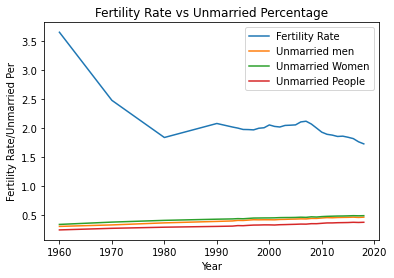

In [11]:
##line chart compared unmarried percentage vs fertility rate
y_axis4 = fertility_rate
y_axis5 = clean_marital_df['Per of unmarried men']
y_axis6 = clean_marital_df['Per of unmarried women']
y_axis7=clean_marital_df["Per of unmarried peole"]

plt.plot(x_axis_data, y_axis4,label="Fertility Rate")
plt.plot(x_axis_data, y_axis5,label="Unmarried men")
plt.plot(x_axis_data, y_axis6,label="Unmarried Women")
plt.plot(x_axis_data,y_axis7,label="Unmarried People")
plt.legend(loc="best")
plt.xlabel('Year')
plt.ylabel('Fertility Rate/Unmarried Per')
plt.title('Fertility Rate vs Unmarried Percentage')
#save fig
plt.savefig("Output/fertility_unmarried_line.png")

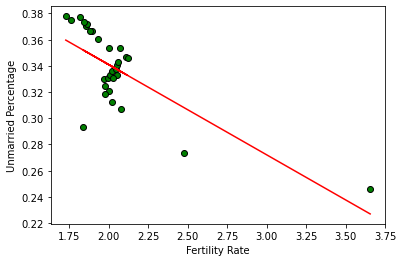

The correlation between both factors is -0.74


<Figure size 432x288 with 0 Axes>

In [12]:
#scatter plot fertility rate vs unmarried people
plt.scatter(fertility_rate, unmarried_per, marker="o", facecolors="green", edgecolors="black")
plt.xlabel('Fertility Rate')
plt.ylabel('Unmarried Percentage')

#regression
model = st.linregress(fertility_rate, unmarried_per)
y_value1=fertility_rate*model[0]+model[1]
plt.plot(fertility_rate,y_value1,color="red")
plt.show()

#correlation
correlation = st.pearsonr(fertility_rate,unmarried_per)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#save fig
plt.savefig("Output/fertility_unmarried_scatter.png")

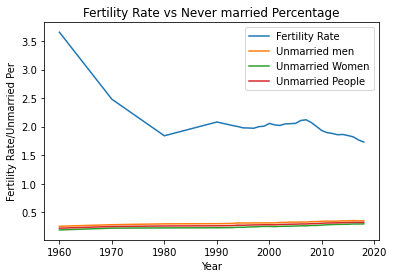

In [19]:
##line chart compared never married percentage vs fertility rate
y_axis8 = fertility_rate
y_axis9 = clean_marital_df['Per of Never married men']
y_axis10 = clean_marital_df['Per of Never married women']
y_axis11=clean_marital_df["Per of Never married peole"]

plt.plot(x_axis_data, y_axis8,label="Fertility Rate")
plt.plot(x_axis_data, y_axis9,label="Unmarried men")
plt.plot(x_axis_data, y_axis10,label="Unmarried Women")
plt.plot(x_axis_data,y_axis11,label="Unmarried People")
plt.legend(loc="best")
plt.xlabel('Year')
plt.ylabel('Fertility Rate/Unmarried Per')
plt.title('Fertility Rate vs Never married Percentage')
#save fig
plt.savefig("Output/fertility_nevermarried_line.png")

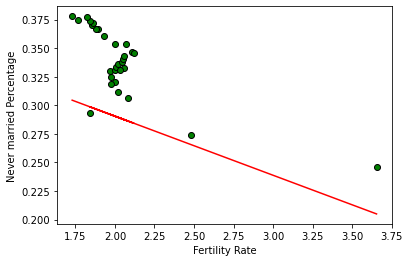

The correlation between both factors is -0.72


<Figure size 432x288 with 0 Axes>

In [14]:
##scatter plot fertility rate vs never married people
plt.scatter(fertility_rate, unmarried_per, marker="o", facecolors="green", edgecolors="black")
plt.xlabel('Fertility Rate')
plt.ylabel('Never married Percentage')

#regression
model = st.linregress(fertility_rate, never_per)
y_value1=fertility_rate*model[0]+model[1]
plt.plot(fertility_rate,y_value1,color="red")
plt.show()

#correlation
correlation = st.pearsonr(fertility_rate,never_per)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#save fig
plt.savefig("Output/fertility_nevermarried_scatter.png")

The tend is same as fertility vs married people. It proves again variable "married" and "unmarried","married" and "never married" are the same factors. 

## Fertility Rate vs Age

In [ ]:
# Raw DataFrame Prep: Fertility by Age

# Read csv
age_fertility_df = pd.read_csv(age_fertility_path)

# Clean
age_fertility_df = age_fertility_df[['Year', 'Age 10-14 Years', 'Age 15-19 Years', 'Age 20-24 Years',
                           'Age 25-29 Years', 'Age 30-34 Years', 'Age 35-39 Years', 'Age 40-44 Years', 'Age 45-49 Years']]

# Merge with fertility rates
merge_age_df = pd.merge(fertility_rate_df, age_fertility_df, on="Year", how="outer")

# Print and display
print(f'{len(merge_age_df)} records')
merge_age_df.head()

# Print to csv - remove hashmark in front of below code to export to csv
# merge_age_df.to_csv("Output/fertility_age.csv", index=False, header=True)

## Fertility Rate vs Education

In [ ]:
# Raw DataFrame Prep: Female Education Attainment Level

# Read csv and drop na
education_df = pd.read_csv(education_path).dropna()

# Clean
education_df.rename(columns = {'Years':'Year'}, inplace=True)

# Merge with fertility rates
merge_education_df = pd.merge(fertility_rate_df, education_df, on="Year", how="outer")

# Print and display
print(f'{len(merge_education_df)} records')
merge_education_df.head()

# Print to csv - remove hashmark in front of below code to export to csv
# merge_education_df.to_csv("Output/education.csv", index=False, header=True)